In [ ]:
!nvidia-smi

Thu Oct 17 13:20:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install accelerate
!pip install transformers==4.45.2
!pip install bitsandbytes
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 34.5 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 7.4 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, AutoConfig

model_name_or_path = 'openchat/openchat-3.5-1210'
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)
base_model_config = AutoConfig.from_pretrained(model_name_or_path)

model = AutoModelForCausalLM.from_pretrained(
    model_name_or_path,
    torch_dtype=base_model_config.torch_dtype,
    load_in_8bit=False,
    device_map="auto",
    attn_implementation='sdpa',
)
model.eval()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/623 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/179 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:601: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.5` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:601: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.5` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


MistralForCausalLM(
  (model): MistralModel(
    (embed_tokens): Embedding(32002, 4096)
    (layers): ModuleList(
      (0-31): 32 x MistralDecoderLayer(
        (self_attn): MistralSdpaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): MistralRotaryEmbedding()
        )
        (mlp): MistralMLP(
          (gate_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): MistralRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): MistralRMSNorm((4096,), eps=1e-05)
     

## Влияние температуры на вероятность следующего токена

In [ ]:
from transformers import GenerationConfig

generation_config = GenerationConfig.from_pretrained(model_name_or_path)
generation_config

GenerationConfig {
  "bos_token_id": 1,
  "eos_token_id": 32000,
  "max_length": 8192,
  "pad_token_id": 0,
  "temperature": 0.5
}

In [ ]:
import torch
def next_token_probs(text):
    data = {k: v.to(model.device) for k, v in tokenizer(text, return_tensors='pt').items()}
    with torch.no_grad():
        output = model(**data)
        logits = output.logits.detach().cpu()[:,-1,:]
        probs = torch.nn.Softmax(dim=-1)(logits).numpy()
    return probs

In [ ]:
text = 'СССР расшифровывается как'
probs = next_token_probs(text)
probs.shape

Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)


(1, 32002)

In [ ]:
topk_probs = probs[0].argsort()[-10:]
print(topk_probs)
for idx in topk_probs:
    print(tokenizer.convert_ids_to_tokens([idx])[0], probs[0][idx])

[ 2573 13325   981 20769 12430  1406 28747   345  1509  7447]
▁со 0.0047329823
▁Росси 0.0047329823
▁“ 0.0050382335
▁СССР 0.0068864482
▁Си 0.012086093
▁С 0.016519733
: 0.02558626
▁" 0.047801428
▁« 0.06955067
▁Со 0.74774015


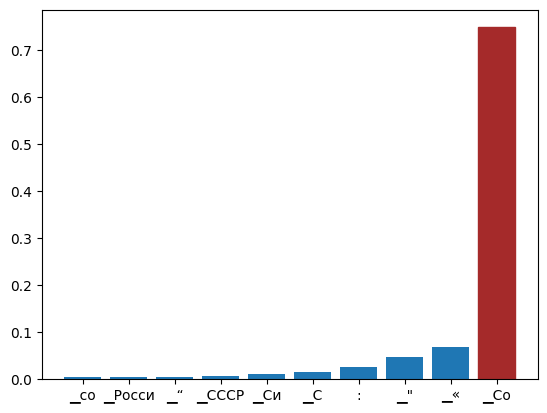

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.array([i for i in range(len(topk_probs))])
y = np.array([probs[0][idx] for idx in topk_probs])
my_xticks = [tokenizer.convert_ids_to_tokens([idx])[0] for idx in topk_probs]
plt.xticks(x, my_xticks)

ax = plt.bar(x, y)
ax.get_children()[-1].set_color("brown")
plt.show()

In [ ]:
text = 'СССР расшифровывается как '
probs = next_token_probs(text)
topk_probs = probs[0].argsort()[-10:]
print(topk_probs)
for idx in topk_probs:
    print(tokenizer.convert_ids_to_tokens([idx])[0], probs[0][idx])


[ 1509 29571   229    13 29137 29124 28750 29331  7447 28740]
▁« 0.023777165
Σ 0.023777165
<0xE2> 0.028680734
<0x0A> 0.028680734
� 0.028680734
Щ 0.030530483
2 0.036826793
 0.04442159
▁Со 0.064633034
1 0.12853813


## Влияние температуры на генерацию

In [ ]:
def generate(prompt, generation_config):
    data = tokenizer(
        prompt,
        return_tensors="pt",
    )
    data = {k: v.to(model.device) for k, v in data.items()}
    output_ids = model.generate(
        **data,
        generation_config=generation_config
    )
    outputs = []
    for sample_output_ids, sample_input_ids in zip(output_ids, data["input_ids"]):
        sample_output_ids = sample_output_ids[len(sample_input_ids):]
        sample_output = tokenizer.decode(sample_output_ids, skip_special_tokens=True)
        sample_output = sample_output.replace("</s>", "").strip()
        outputs.append(sample_output)
    return outputs[0]

In [ ]:
question = 'Что такое LLM?'
messages = [{'role': 'user', 'content': question}]
prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
prompt

'<s>GPT4 Correct User: Что такое LLM?<|end_of_turn|>GPT4 Correct Assistant:'

In [ ]:
generation_config.do_sample=False
generation_config.max_new_tokens = 128
generation_config

GenerationConfig {
  "bos_token_id": 1,
  "eos_token_id": 32000,
  "max_length": 8192,
  "max_new_tokens": 128,
  "pad_token_id": 0,
  "temperature": 0.5
}

In [ ]:
res = generate(prompt, generation_config)
print(res)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:601: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.5` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


LLM (Large Language Model) - это тип машинного обучения, который используется для моделирования и анализа текстовых данных. LLM обучается на больших объемах текстовых данных и способен генерировать текст, который похож на человеческое письмо. LLM широко используется в различных областях, таких как естественный язык, машинное обучение, искусственный интеллект и другие.


In [ ]:
res = generate(prompt, generation_config)
print(res)

LLM (Large Language Model) - это тип машинного обучения, который используется для моделирования и анализа текстовых данных. LLM обучается на больших объемах текстовых данных и способен генерировать текст, который похож на человеческое письмо. LLM широко используется в различных областях, таких как естественный язык, машинное обучение, искусственный интеллект и другие.


In [ ]:
generation_config.do_sample=True
generation_config.max_new_tokens = 128
generation_config.temperature = 1.0
generation_config

GenerationConfig {
  "bos_token_id": 1,
  "do_sample": true,
  "eos_token_id": 32000,
  "max_length": 8192,
  "max_new_tokens": 128,
  "pad_token_id": 0
}

In [ ]:
res = generate(prompt, generation_config)
print(res)

LLM может иметь несколько значений:

1. LLM может означать "Language Model" (модель языка в переводе с английского) - это общая концепция в области искусственного интеллекта, которая используется в разных областях для описания различных моделей, работающих с естественными языками. Можно употреблять в контексте трансформерных моделей, таких как GPT-3 и BERT,


In [ ]:
generation_config.do_sample=True
generation_config.max_new_tokens = 128
generation_config.temperature = 0.2
generation_config

GenerationConfig {
  "bos_token_id": 1,
  "do_sample": true,
  "eos_token_id": 32000,
  "max_length": 8192,
  "max_new_tokens": 128,
  "pad_token_id": 0,
  "temperature": 0.2
}

In [ ]:
res = generate(prompt, generation_config)
print(res)

LLM (Large Language Model) - это машинный обучаемый модель, который используется для анализа и генерации текста. Он основан на архитектуре нейронных сетей и обучается на больших объемах текстовых данных, чтобы понимать и генерировать текст, похожий на то, что создаёт человек. LLM могут применяться в различных областях, таких как автоматическое сгенерирование контента


In [ ]:
generation_config.do_sample=True
generation_config.max_new_tokens = 128
generation_config.temperature = 1.0
generation_config.num_beams = 8
generation_config

GenerationConfig {
  "bos_token_id": 1,
  "do_sample": true,
  "eos_token_id": 32000,
  "max_length": 8192,
  "max_new_tokens": 128,
  "num_beams": 8,
  "pad_token_id": 0
}

In [ ]:
res = generate(prompt, generation_config)
print(res)

LLM - это аббревиатура, которая может означать несколько разных вещей в зависимости от контекста:

1. LLM - это аббревиатура от "Large Language Model" (на русском языке это можно перевести как "большая языковая модель"). Это термин, используемый в машинном обучении и искусственном интеллекте. Большие языковые модели, такие как GPT-


In [ ]:
generation_config.do_sample = True
generation_config.max_new_tokens = 256
generation_config.temperature = 0.2
generation_config.top_k = 40
generation_config.top_p = 0.9
generation_config.num_beams = 1
generation_config

GenerationConfig {
  "bos_token_id": 1,
  "do_sample": true,
  "eos_token_id": 32000,
  "max_length": 8192,
  "max_new_tokens": 256,
  "pad_token_id": 0,
  "temperature": 0.2,
  "top_k": 40,
  "top_p": 0.9
}

In [ ]:
res = generate(prompt, generation_config)
print(res)

LLM (Large Language Model) - это тип машинного обучения, который используется для моделирования и анализа текстовых данных. LLM обучается на больших объемах текстовых данных и способен генерировать текст, который похож на человеческое письмо. Он также может использоваться для задач классификации, суммаризации текста, машинного перевода и других задач, связанных с обработкой естественного языка. LLM является основой для различных языковых моделей, таких как GPT-3 и BERT.


## Важность repetition_penalty

In [ ]:
generation_config.do_sample = True
generation_config.max_new_tokens = 256
generation_config.temperature = 0.2
generation_config.top_k = 40
generation_config.top_p = 0.9
generation_config.num_beams = 1
generation_config.repetition_penalty = 1.0
generation_config

GenerationConfig {
  "bos_token_id": 1,
  "do_sample": true,
  "eos_token_id": 32000,
  "max_length": 8192,
  "max_new_tokens": 256,
  "pad_token_id": 0,
  "temperature": 0.2,
  "top_k": 40,
  "top_p": 0.9
}

In [ ]:
text = '''Работа выполнена под руководством заведующего кафедрой региональной геологии и истории Земли геологического факультета МГУ Анатолия Никишина - одного из наиболее известных исследователей российской Арктики.'''

question = f'Текст: {text}\nИзвлеки все именованные сущности типов PER, LOC, ORG из текста и представь ответ в формате json.'
messages = [{'role': 'user', 'content': question}]
prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
prompt

'<s>GPT4 Correct User: Текст: Работа выполнена под руководством заведующего кафедрой региональной геологии и истории Земли геологического факультета МГУ Анатолия Никишина - одного из наиболее известных исследователей российской Арктики.\nИзвлеки все именованные сущности типов PER, LOC, ORG из текста и представь ответ в формате json.<|end_of_turn|>GPT4 Correct Assistant:'

In [ ]:
res = generate(prompt, generation_config)
print(res)

{
  "PER": [
    "Анатолий Никишин"
  ],
  "LOC": [
    "российская Арктика"
  ],
  "ORG": [
    "геологического факультета МГУ",
    "кафедрой региональной геологии и истории Земли"
  ]
}


In [ ]:
generation_config.repetition_penalty = 1.5
generation_config

GenerationConfig {
  "bos_token_id": 1,
  "do_sample": true,
  "eos_token_id": 32000,
  "max_length": 8192,
  "max_new_tokens": 256,
  "pad_token_id": 0,
  "repetition_penalty": 1.5,
  "temperature": 0.2,
  "top_k": 40,
  "top_p": 0.9
}

In [ ]:
res = generate(prompt, generation_config)
print(res)

{
  "PER": [{"entity_type":"person", "value":"Анатолий Ниkiшин"}],
  "LOC": [],
  "ORG": [{
    "organization\_name" : ["геологiческий фaктулeт"],
    "parentOrganizations" :[{
      "hierarchyLevel1Name" :["Мoсковский Государственный Университеt"]}]}]
}


## Промптинг на примере задачи таргетированного анализа тональности

In [ ]:
generation_config.do_sample = True
generation_config.max_new_tokens = 256
generation_config.temperature = 0.2
generation_config.top_k = 40
generation_config.top_p = 0.9
generation_config.num_beams = 1
generation_config.repetition_penalty = 1.05
generation_config

GenerationConfig {
  "bos_token_id": 1,
  "do_sample": true,
  "eos_token_id": 32000,
  "max_length": 8192,
  "max_new_tokens": 256,
  "pad_token_id": 0,
  "repetition_penalty": 1.05,
  "temperature": 0.2,
  "top_k": 40,
  "top_p": 0.9
}

In [ ]:
sentence = 'Фенербахче Соколовой добился победы в чемпионате Турции'
entity = 'Турция'
question = f'''Предложение: {sentence}
Твоя задача предсказать тональность в предложении по отношению к сущности {entity}. Тональность может быть положительной, нейтральной, негативной. Ответь одним словом.'''

messages = [{'role': 'user', 'content': question}]
prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
prompt


'<s>GPT4 Correct User: Предложение: Фенербахче Соколовой добился победы в чемпионате Турции\nТвоя задача предсказать тональность в предложении по отношению к сущности Турция. Тональность может быть положительной, нейтральной, негативной. Ответь одним словом.<|end_of_turn|>GPT4 Correct Assistant:'

In [ ]:
res = generate(prompt, generation_config)
print(res)

Положительная


In [ ]:
sentence = 'Фенербахче Соколовой добился победы в чемпионате Турции'
entity = 'Турция'
question = f'''Предложение: {sentence}
Твоя задача предсказать тональность в предложении по отношению к конкретной сущности {entity}. Тональность может быть положительной, нейтральной, негативной. Сначала приведи рассуждение, а после него ответь.'''

messages = [{'role': 'user', 'content': question}]
prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
prompt


'<s>GPT4 Correct User: Предложение: Фенербахче Соколовой добился победы в чемпионате Турции\nТвоя задача предсказать тональность в предложении по отношению к конкретной сущности Турция. Тональность может быть положительной, нейтральной, негативной. Сначала приведи рассуждение, а после него ответь.<|end_of_turn|>GPT4 Correct Assistant:'

In [ ]:
res = generate(prompt, generation_config)
print(res)

Рассмотрение тональности предложения "Фенербахче Соколовой добился победы в чемпионате Турции" по отношению к конкретной сущности Турция:

Предложение сообщает о победе Фенербахче Соколовой в чемпионате Турции, что является спортивным событием. В данном случае, можно сказать, что тональность предложения нейтральна, так как оно не выражает положительную или негативную оценку Турции в целом. Оно просто сообщает факт победы команды на турнире, проводимом в стране.


In [ ]:
sentence = 'Рассел Брэнд опозорил свою жену Кэти Перри на весь Интернет.'
entity = 'Интернет'
question = f'''Предложение: {sentence}
Твоя задача предсказать тональность в предложении по отношению к конкретной сущности {entity}. Тональность может быть положительной, нейтральной, негативной. Сначала приведи рассуждение, а после него ответь.'''

messages = [{'role': 'user', 'content': question}]
prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
prompt

'<s>GPT4 Correct User: Предложение: Рассел Брэнд опозорил свою жену Кэти Перри на весь Интернет.\nТвоя задача предсказать тональность в предложении по отношению к конкретной сущности Интернет. Тональность может быть положительной, нейтральной, негативной. Сначала приведи рассуждение, а после него ответь.<|end_of_turn|>GPT4 Correct Assistant:'

In [ ]:
res = generate(prompt, generation_config)
print(res)

Рассмотрев предложение, можно сделать вывод, что тональность по отношению к конкретной сущности "Интернет" является негативной. Это связано с тем, что в данном контексте Интернет используется для распространения негативной информации (опорочьей) о человеке и его семье.


In [ ]:
few_shot = [
    {'sentence': 'Пять человек пострадали в результате взрыва бытового газа в Подмосковье, сообщил ""Интерфаксу"" источник в правоохранительных органах.', 'entity': 'Интерфакс', 'answer': 'В данном тексте описывается авария в Подмосковье, в которой пострадали люди. Несмотря на то, что само событие негативное, Интерфакс в данном предложении не относится непосредственно к нему, а лишь является новостным агенством, которое сообщает эту информацию. По этим причинам ответ: нейтральная.'},
]

messages  = []
for example in few_shot:
    sentence = example['sentence']
    entity = example['entity']
    question = f'''Предложение: {sentence}
Твоя задача предсказать тональность в предложении по отношению к конкретной сущности {entity}. Тональность может быть положительной, нейтральной, негативной. Сначала приведи рассуждение, а после него ответь.'''
    messages.append({'role': 'user', 'content': question})
    messages.append({'role': 'assistant', 'content': example['answer']})

sentence = 'Рассел Брэнд опозорил свою жену Кэти Перри на весь Интернет.'
entity = 'Интернет'

question = f'''Предложение: {sentence}
Твоя задача предсказать тональность в предложении по отношению к конкретной сущности {entity}. Тональность может быть положительной, нейтральной, негативной. Сначала приведи рассуждение, а после него ответь.'''
messages.append({'role': 'user', 'content': question})
prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
print(prompt)

<s>GPT4 Correct User: Предложение: Пять человек пострадали в результате взрыва бытового газа в Подмосковье, сообщил ""Интерфаксу"" источник в правоохранительных органах.
Твоя задача предсказать тональность в предложении по отношению к конкретной сущности Интерфакс. Тональность может быть положительной, нейтральной, негативной. Сначала приведи рассуждение, а после него ответь.<|end_of_turn|>GPT4 Correct Assistant: В данном тексте описывается авария в Подмосковье, в которой пострадали люди. Несмотря на то, что само событие негативное, Интерфакс в данном предложении не относится непосредственно к нему, а лишь является новостным агенством, которое сообщает эту информацию. По этим причинам ответ: нейтральная.<|end_of_turn|>GPT4 Correct User: Предложение: Рассел Брэнд опозорил свою жену Кэти Перри на весь Интернет.
Твоя задача предсказать тональность в предложении по отношению к конкретной сущности Интернет. Тональность может быть положительной, нейтральной, негативной. Сначала приведи рассу

In [ ]:
res = generate(prompt, generation_config)
print(res)

В данном тексте упоминается, что Рассел Брэнд опубликовал некое содержание, связанное с его женой Кэти Перри, и это содержание стало доступным на Интернет. Здесь Интернет является средством распространения информации, а не прямым объектом описания. Поэтому тональность по отношению к конкретной сущности Интернет в данном предложении можно считать нейтральной.
